# Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# Data Exploration

In [2]:
# Load the dataset
data = pd.read_csv('RFLFSODataFull.csv')

data.head()

,FSO_Att,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,...,TemperatureMax,TemperatureMin,Time,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin
0,7.913289,6.927868,17.595709,17.615907,17.340148,2115.338398,83500000000,0.0,0.0,0.0,...,26.603030,24.680849,9,65884.51846,72336.362233,65617.543754,88.755450,3.057066,6.863808,3.007939
1,7.451176,4.412096,17.549693,17.572415,17.299439,2113.999257,73500000000,0.0,0.0,0.0,...,26.377164,24.313108,9,64963.41092,68753.386153,60379.327485,99.790057,2.727910,6.468903,2.537393
2,7.072747,6.268740,17.290230,17.644014,16.037894,2118.689047,83500000000,0.0,0.0,0.0,...,27.670822,23.150277,10,54794.28107,54821.773817,50850.155963,65.730085,1.674810,2.826916,1.640809
3,6.949288,4.317853,16.820880,17.066776,15.895622,2114.632339,73500000000,0.0,0.0,0.0,...,26.522100,23.174815,10,50205.64159,52519.927530,45374.510898,88.127497,0.962068,2.780643,0.886951
4,7.361052,6.114514,16.813820,17.953974,15.227225,2116.786055,83500000000,0.0,0.0,0.0,...,26.305736,24.864100,10,59038.32599,64418.329138,54461.246506,84.167414,1.881007,4.476298,1.874052


In [3]:
# Check dataset shape, information, statistic summary.
data_shape = data.shape
data_info = data.info()
data_describe = data.describe()

data_info, data_describe, data_shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91379 entries, 0 to 91378
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FSO_Att                91379 non-null  float64
 1   RFL_Att                91379 non-null  float64
 2   AbsoluteHumidity       91379 non-null  float64
 3   AbsoluteHumidityMax    91379 non-null  float64
 4   AbsoluteHumidityMin    91379 non-null  float64
 5   Distance               91379 non-null  float64
 6   Frequency              91379 non-null  int64  
 7   Particulate            91379 non-null  float64
 8   ParticulateMax         91379 non-null  float64
 9   ParticulateMin         91379 non-null  float64
 10  RainIntensity          91379 non-null  float64
 11  RainIntensityMax       91379 non-null  float64
 12  RainIntensityMin       91379 non-null  float64
 13  RelativeHumidity       91379 non-null  float64
 14  SYNOPCode              91379 non-null  int64  
 15  Te

(None,
             FSO_Att       RFL_Att  AbsoluteHumidity  AbsoluteHumidityMax  \
 count  91379.000000  91379.000000      91379.000000         91379.000000   
 mean       6.769458     11.619098          9.553919            10.032760   
 std        3.903843      3.438873          5.858577             6.162798   
 min        0.788363      0.027142          1.141556             1.238270   
 25%        3.473063     10.829331          4.958993             5.205861   
 50%        6.336167     11.856560          6.870737             7.205499   
 75%        8.664984     12.847944         14.049470            14.782679   
 max       32.455222     46.893150         24.790883            26.407305   
 
        AbsoluteHumidityMin      Distance     Frequency   Particulate  \
 count         91379.000000  91379.000000  9.137900e+04  91379.000000   
 mean              9.076251   3297.930328  7.850005e+10     27.065979   
 std               5.575927   1224.305893  5.000027e+09     72.134023   
 min  

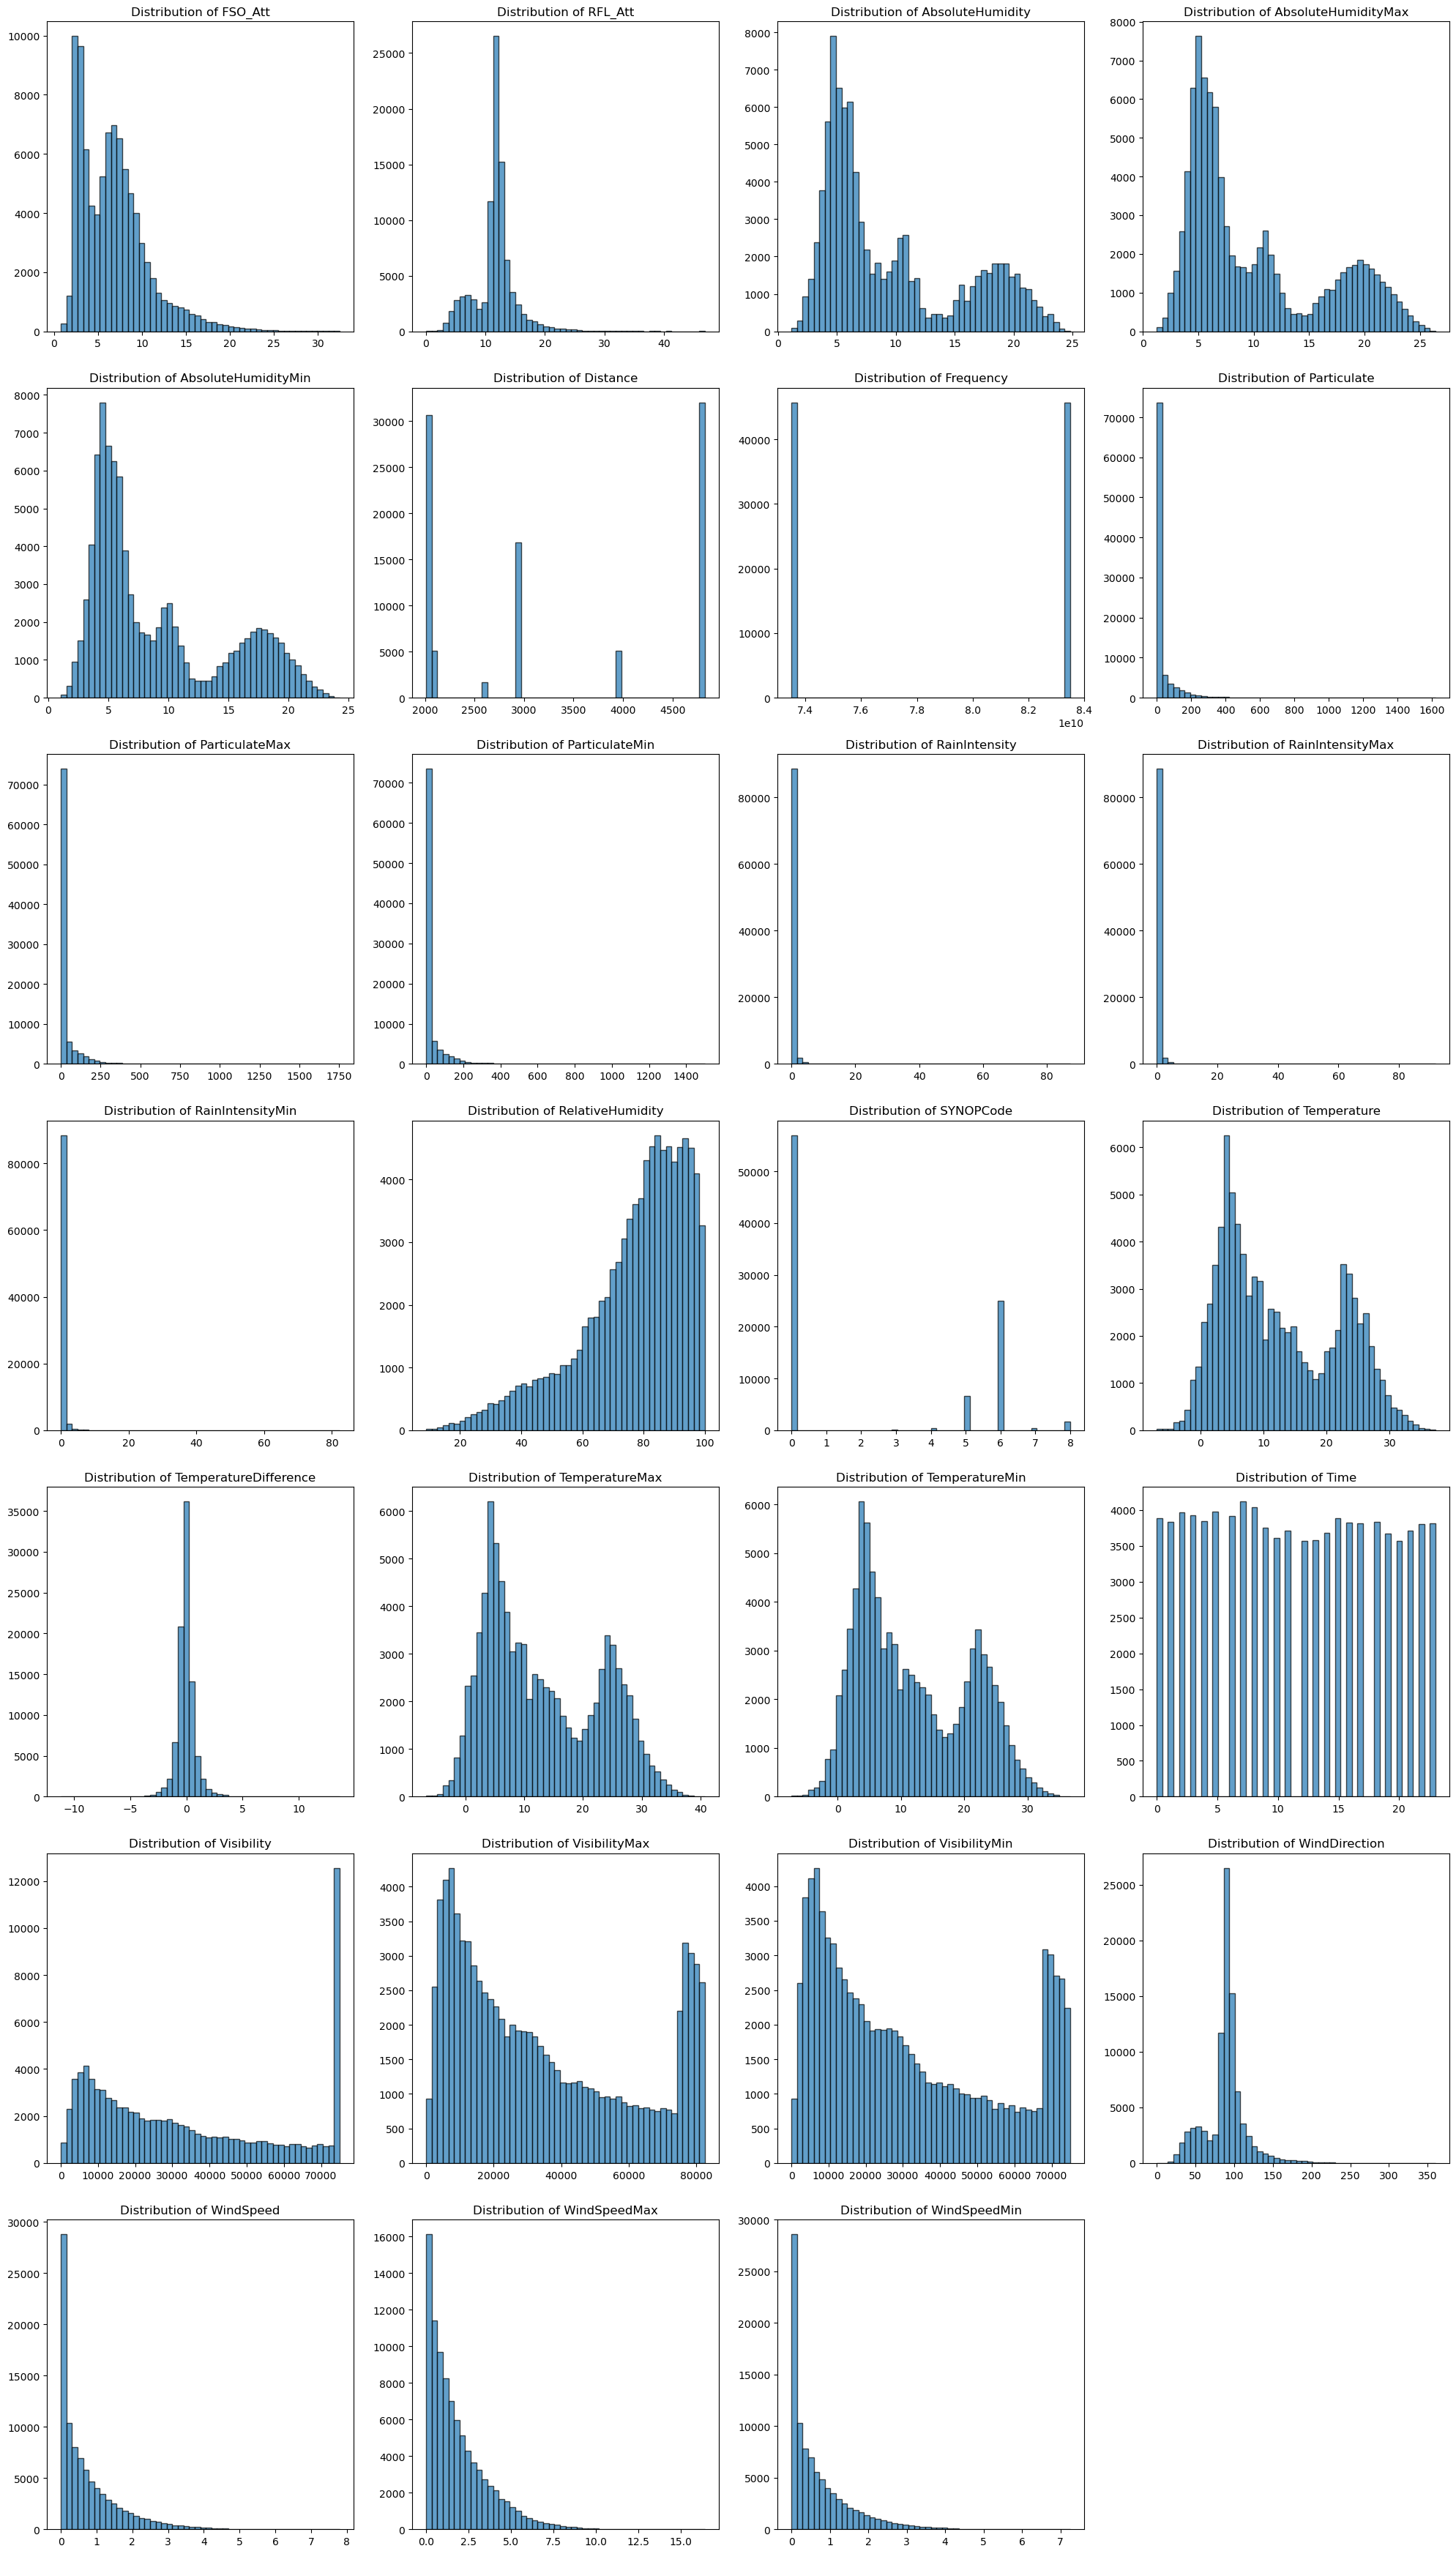

In [4]:
# Define the number of rows and coloumns for subplots
n_rows = int(len(data.columns) / 4) + 1
n_cols = 4

# Create a figure and set up figure size
plt.figure(figsize=(20, 35))

# Iterater over the data columns and create plots
for idx, column in enumerate(data):
    plt.subplot(n_rows, n_cols, idx + 1)
    plt.hist(data[column], bins=50, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {column}')

plt.tight_layout()

# show the distribution of variables of whole dataset
plt.show()

# Radio Frequency Link (RFL)

In [5]:
data_rfl = data.drop(columns=['FSO_Att'])

data_rfl.head()

,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,RainIntensity,...,TemperatureMax,TemperatureMin,Time,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin
0,6.927868,17.595709,17.615907,17.340148,2115.338398,83500000000,0.0,0.0,0.0,0.0,...,26.603030,24.680849,9,65884.51846,72336.362233,65617.543754,88.755450,3.057066,6.863808,3.007939
1,4.412096,17.549693,17.572415,17.299439,2113.999257,73500000000,0.0,0.0,0.0,0.0,...,26.377164,24.313108,9,64963.41092,68753.386153,60379.327485,99.790057,2.727910,6.468903,2.537393
2,6.268740,17.290230,17.644014,16.037894,2118.689047,83500000000,0.0,0.0,0.0,0.0,...,27.670822,23.150277,10,54794.28107,54821.773817,50850.155963,65.730085,1.674810,2.826916,1.640809
3,4.317853,16.820880,17.066776,15.895622,2114.632339,73500000000,0.0,0.0,0.0,0.0,...,26.522100,23.174815,10,50205.64159,52519.927530,45374.510898,88.127497,0.962068,2.780643,0.886951
4,6.114514,16.813820,17.953974,15.227225,2116.786055,83500000000,0.0,0.0,0.0,0.0,...,26.305736,24.864100,10,59038.32599,64418.329138,54461.246506,84.167414,1.881007,4.476298,1.874052


## Split Data

In [6]:
# Split RFL dataset into Target variable (y) is 'RFL_Att' and features (X) are the remaining columns
X = data_rfl.drop(columns=['RFL_Att'])
y = data_rfl['RFL_Att']

# Split the data into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Check the shapes of each datasets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((68534, 25), (22845, 25), (68534,), (22845,))

## RFL Specific Random Forest
The training data is split into 7 small data sets for 7 different weather conditions

In [7]:
# Create a dictionary that showing different weather match different SYNOP code
synop_codes = {
    'clear': 0,
    'dust storm': 3,
    'fog': 4,
    'drizzle': 5,
    'rain': 6,
    'snow': 7,
    'showers': 8
}

# Initialize variables store the results
# models = {}
train_subsets = {}

# Split training data into 7 subsets based on SYNOPCode
for condition, synop_value in synop_codes.items():
    # Select the training set for the specific SYNOP code
    synop_tag = X_train['SYNOPCode'] == synop_value
    X_train_subset = X_train[synop_tag]
    y_train_subset = y_train[synop_tag]

    # Store the training subset
    if len(X_train_subset) > 0:
        train_subsets[condition] = (X_train_subset, y_train_subset)
    else:
        print(f"No training data available for {condition.capitalize()}")

### Feature Selection based on Out-of-bag (OOB)

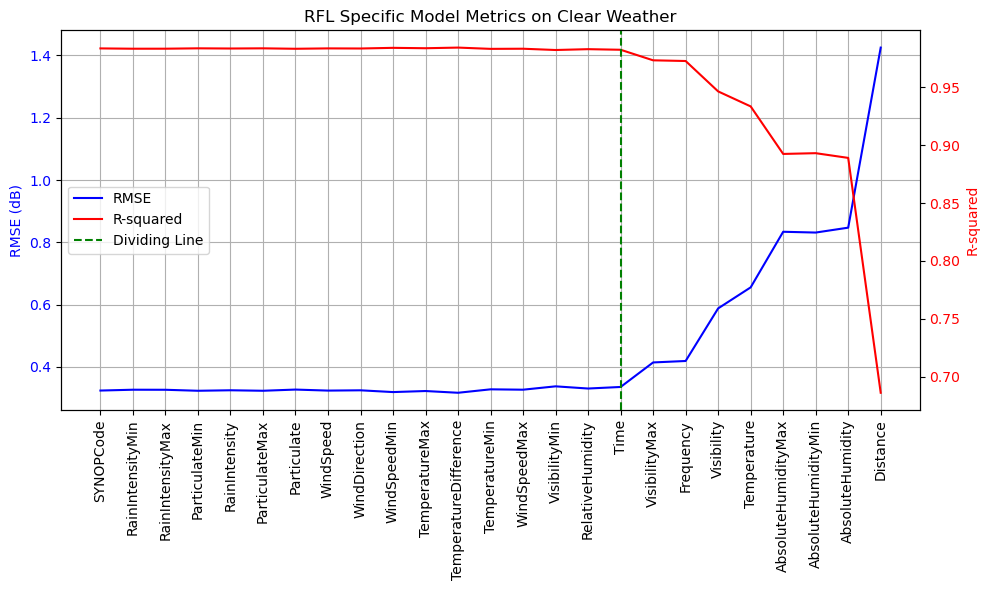

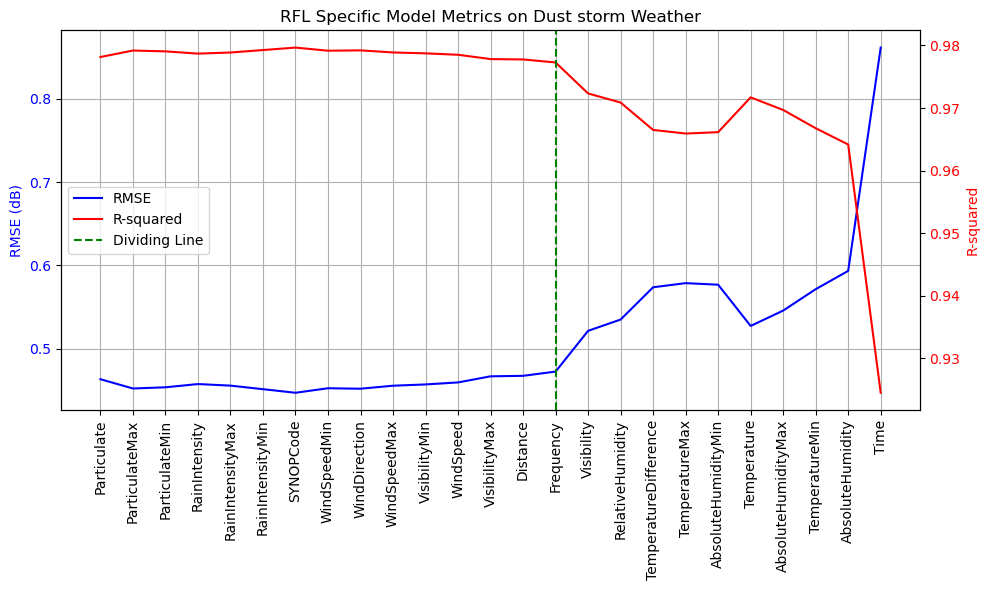

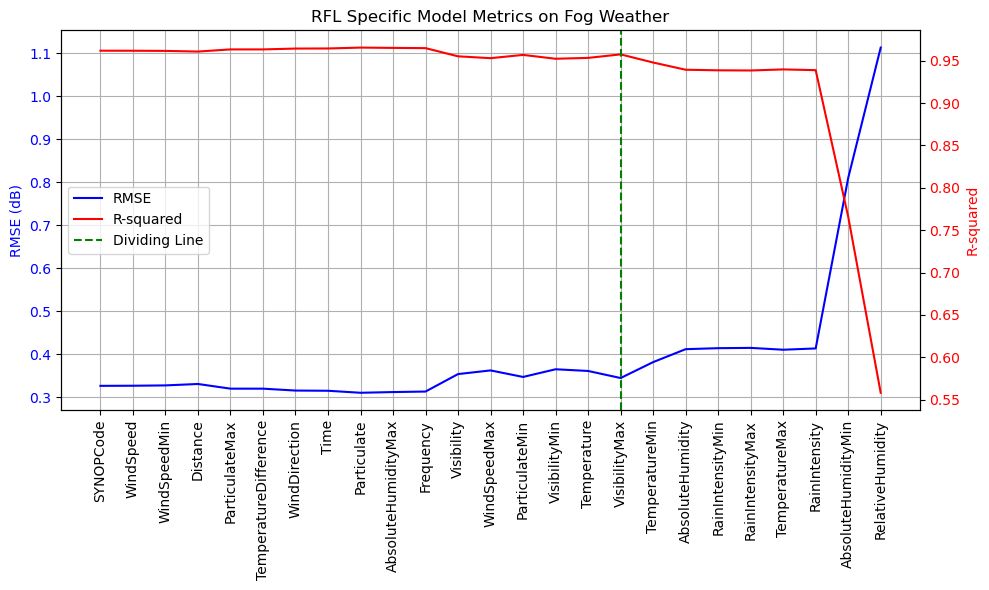

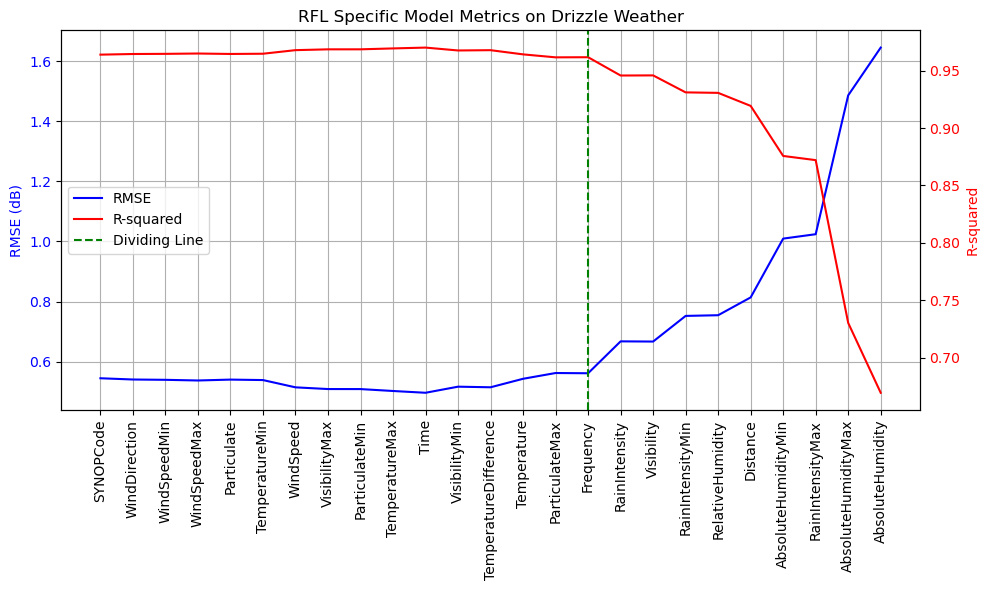

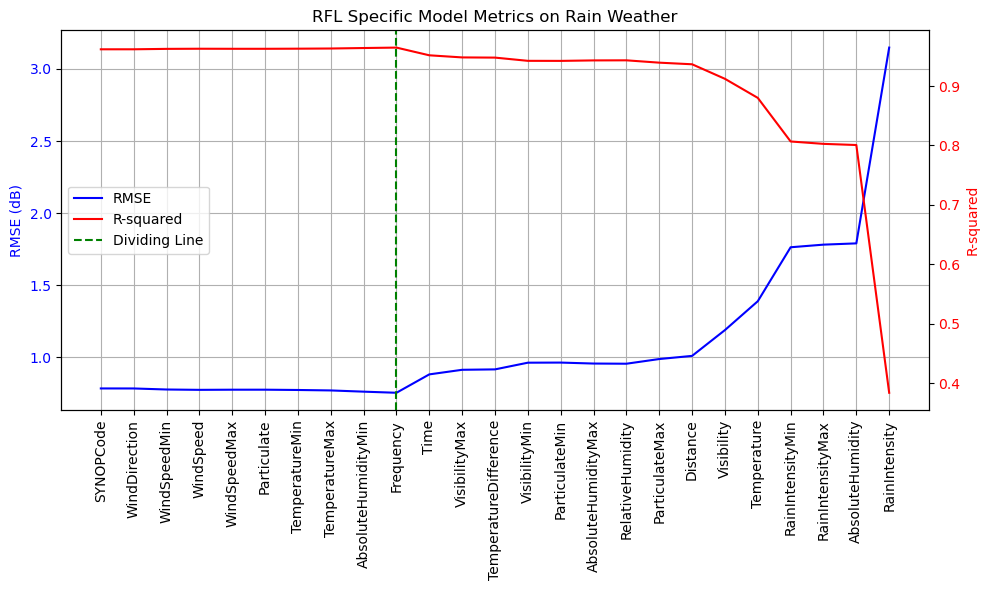

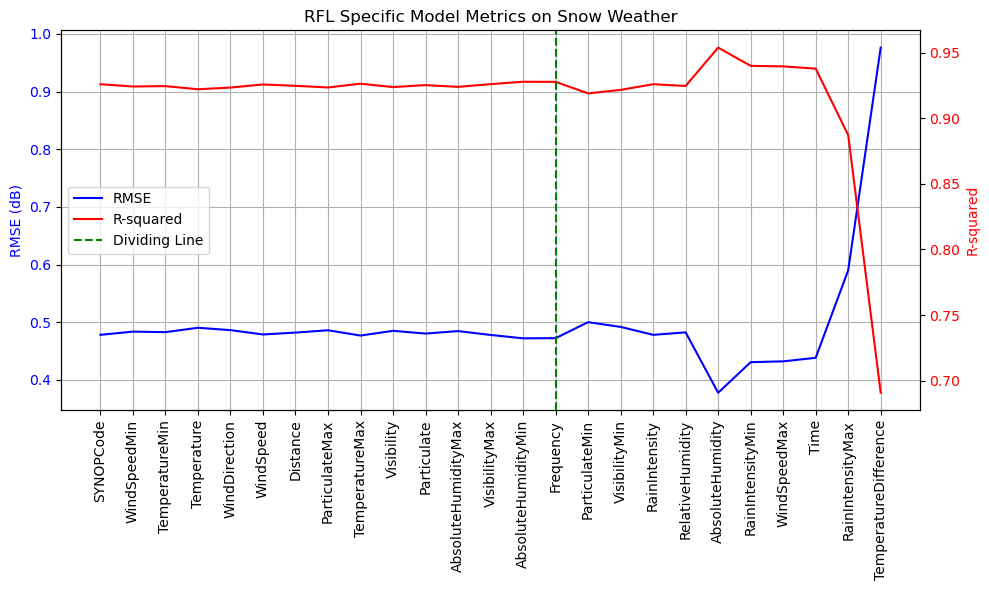

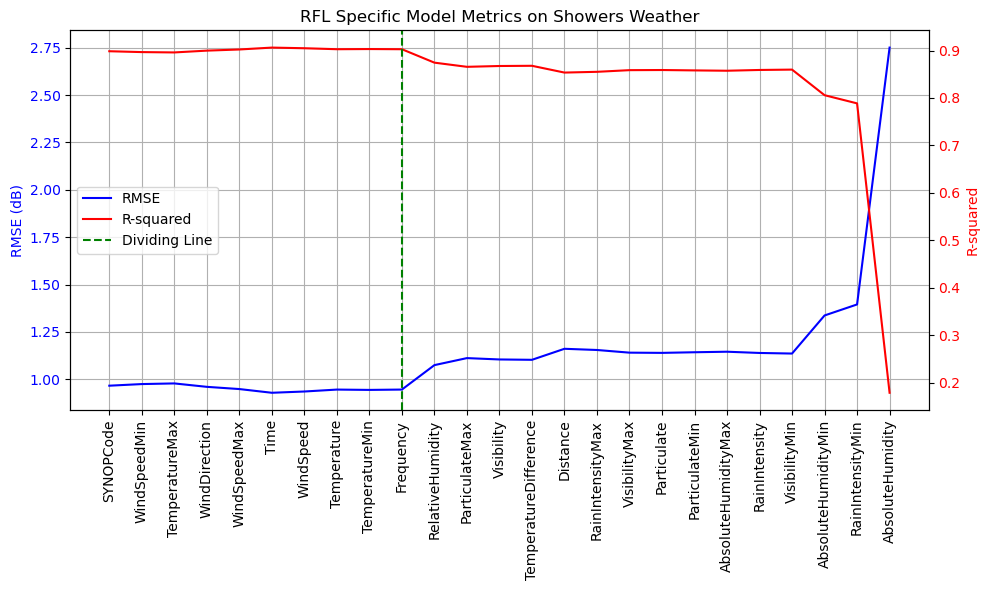

In [8]:
# Train a Random Forest model for each subset
for condition, (X_train_subset, y_train_subset) in train_subsets.items():
    # Create a Random Forest Regressor with OOB enabled
    model = RandomForestRegressor(oob_score=True, n_jobs=-1, random_state=42)
    
    # Fit the model with the initial set of training data
    model.fit(X_train_subset, y_train_subset)

    # Initialize variables to store the results
    cumulative_rmse = []
    cumulative_r2 = []
    cumulative_results = []
    removed_feature_names = []

    # Start all features at start
    selected_features = X_train_subset.columns.tolist()
    
    # Select the testing set for the specific SYNOP code
    synop_tag = X_test['SYNOPCode'] == synop_codes[condition]
    X_test_subset = X_test[synop_tag]
    y_test_subset = y_test[synop_tag]
    
    # Iteratively remove features until none are left
    while len(selected_features) > 0:
        # Train the model with the current selected features
        model.fit(X_train_subset[selected_features], y_train_subset)

        # Do predictions on training & testing data
        y_train_subset_pred = model.predict(X_train_subset[selected_features])
        y_test_subset_pred = model.predict(X_test_subset[selected_features])

        # Calculate RMSE & R-squared values
        train_rmse = np.sqrt(mean_squared_error(y_train_subset, y_train_subset_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test_subset, y_test_subset_pred))
        train_r2 = r2_score(y_train_subset, y_train_subset_pred)
        test_r2 = r2_score(y_test_subset, y_test_subset_pred)

        # Store the RMSE, R-squared values for visualization later
        cumulative_rmse.append(test_rmse)
        cumulative_r2.append(test_r2)
        cumulative_results.append((train_rmse, test_rmse, train_r2, test_r2))
        
        # Get the current feature importances
        feature_importances = model.feature_importances_

        # Find the least important feature based on the current model
        least_important_feature_index = feature_importances.argmin()
        least_important_feature_name = selected_features[least_important_feature_index]

        # Track the removed feature
        removed_feature_names.append(least_important_feature_name)

        # Remove the least important feature from the list of selected features
        selected_features.remove(least_important_feature_name)
    
    # Record the turnning point
    if condition == 'clear':
        dividing_line_idx = removed_feature_names.index('Time')
        
    elif condition == 'dust storm':
        dividing_line_idx = removed_feature_names.index('Frequency')
        
    elif condition == 'fog':
        dividing_line_idx = removed_feature_names.index('VisibilityMax')
    
    elif condition == 'drizzle':
        dividing_line_idx = removed_feature_names.index('Frequency')
    
    elif condition == 'rain':
        dividing_line_idx = removed_feature_names.index('Frequency')
        
    elif condition == 'snow':
        dividing_line_idx = removed_feature_names.index('Frequency')
        
    elif condition == 'showers':
        dividing_line_idx = removed_feature_names.index('Frequency')
    
    # Create figure and set up figsize
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot RMSE 
    ax1.plot(removed_feature_names, cumulative_rmse, color='blue', label='RMSE')
    ax1.set_ylabel('RMSE (dB)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.grid(True)

    # Rotate the x-axis labels 90 degrees
    ax1.tick_params(axis='x', labelrotation=90)

    # Plot R-squared 
    ax2 = ax1.twinx()
    ax2.plot(removed_feature_names, cumulative_r2, color='red', label='R-squared')
    ax2.set_ylabel('R-squared', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Add a dividing line to indicate the turning point
    ax2.axvline(x=dividing_line_idx, color='green', linestyle='--', label='Dividing Line')

    
    # Add legends
    line1, label1 = ax1.get_legend_handles_labels()
    line2, label2 = ax2.get_legend_handles_labels()
    ax1.legend(line1 + line2, label1 + label2, loc='center left')

    # Add a title
    plt.title(f'RFL Specific Model Metrics on {condition.capitalize()} Weather')
    plt.tight_layout()

    # Show the plot
    plt.show()

### Train models with only important variables (on the right of dividing line) for each weather condition

In [9]:
# Create a dictionary record only important features
important_features_dict = {
    'clear': ['Time', 'VisibilityMax', 'Frequency', 'Visibility', 'Temperature', 'AbsoluteHumidityMax',
              'AbsoluteHumidityMin', 'AbsoluteHumidity', 'Distance'],
    
    'dust storm': ['Frequency', 'Visibility', 'RelativeHumidity', 'TemperatureDifference', 'TemperatureMax',
                   'AbsoluteHumidityMin', 'Temperature', 'AbsoluteHumidityMax', 'TemperatureMin', 'AbsoluteHumidity',
                   'Time'],
    
    'fog': ['VisibilityMax', 'TemperatureMin', 'AbsoluteHumidity', 'RainIntensityMin', 'RainIntensityMax',
            'TemperatureMax', 'RainIntensity', 'AbsoluteHumidityMin', 'RelativeHumidity'],
    
    'drizzle': ['Frequency', 'RainIntensity', 'Visibility', 'RainIntensityMin', 'RelativeHumidity',
                'Distance', 'AbsoluteHumidityMin', 'RainIntensityMax', 'AbsoluteHumidityMax', 'AbsoluteHumidity'],
    
    'rain': ['VisibilityMax', 'TemperatureDifference', 'VisibilityMin', 'ParticulateMin', 'AbsoluteHumidityMax', 'RelativeHumidity',
             'ParticulateMax', 'Distance', 'Visibility', 'Temperature', 'RainIntensityMin', 'RainIntensityMax', 'AbsoluteHumidity',
             'RainIntensity'],
    
    'snow': ['Frequency', 'ParticulateMin', 'VisibilityMin','RainIntensity', 'RelativeHumidity', 'AbsoluteHumidity',
             'RainIntensityMin', 'WindSpeedMax', 'Time', 'RainIntensityMax', 'TemperatureDifference'],
    
    'showers': ['Frequency', 'RelativeHumidity', 'ParticulateMax', 'Visibility', 'TemperatureDifference', 'Distance', 'RainIntensityMax',
                'VisibilityMax', 'Particulate', 'ParticulateMin', 'AbsoluteHumidityMax', 'RainIntensity', 'VisibilityMin',
                'AbsoluteHumidityMin', 'RainIntensityMin', 'AbsoluteHumidity']
}

In [10]:
# Create a dictionary to store the results
rf_specific_performance_result = {}

# Train the models using the only important features for each condition
for condition, (X_train_subset, y_train_subset) in train_subsets.items():
    # Get the important features for the current condition
    condition_important_features = important_features_dict[condition]

    # Select the only important features for this condition
    X_train_subset_important = X_train_subset[condition_important_features]

    # Train a Random Forest model using the only important features with OOB enabled (n_jobs = -1 means using all CPUs)
    rf_specific = RandomForestRegressor(oob_score=True, n_jobs = -1, random_state=42)
    
    # Fit the model with training data (only important features)
    rf_specific.fit(X_train_subset_important, y_train_subset)

    # Select the test set with the given SYNOP code
    synop_tag = X_test['SYNOPCode'] == synop_codes[condition]
    X_test_subset = X_test[synop_tag]
    y_test_subset = y_test[synop_tag]

    # Select only the important features from the test set for this condition
    X_test_subset_important = X_test_subset[condition_important_features]

    # Check if there's any data to evaluate
    if len(X_test_subset_important) > 0:
        # Do predictions for the specific test subset
        y_pred_subset = rf_specific.predict(X_test_subset_important)

        # Calculate R-squared and RMSE 
        r2_subset = r2_score(y_test_subset, y_pred_subset)
        rmse_subset = np.sqrt(mean_squared_error(y_test_subset, y_pred_subset))

        # Store the results
        rf_specific_performance_result[condition] = {
            'RMSE': rmse_subset,
            'R-squared': r2_subset     
        }
    else:
        print(f"No test data available for {condition}")
        
# Display the results
print(f"RFL Specific Random Forest Model")
print("\n")

for condition, metrics in rf_specific_performance_result.items():
    print(f"Performance for {condition.capitalize()} Weather:")
    print(f"  RMSE (Condition Only): {metrics['RMSE']:.4f}")
    print(f"  R-squared (Condition Only): {metrics['R-squared']:.4f}")
    print("\n")

RFL Specific Random Forest Model


Performance for Clear Weather:
  RMSE (Condition Only): 0.3349
  R-squared (Condition Only): 0.9827


Performance for Dust storm Weather:
  RMSE (Condition Only): 0.4748
  R-squared (Condition Only): 0.9771


Performance for Fog Weather:
  RMSE (Condition Only): 0.3543
  R-squared (Condition Only): 0.9552


Performance for Drizzle Weather:
  RMSE (Condition Only): 0.5598
  R-squared (Condition Only): 0.9618


Performance for Rain Weather:
  RMSE (Condition Only): 0.9145
  R-squared (Condition Only): 0.9480


Performance for Snow Weather:
  RMSE (Condition Only): 0.4774
  R-squared (Condition Only): 0.9261


Performance for Showers Weather:
  RMSE (Condition Only): 0.9398
  R-squared (Condition Only): 0.9041




## RFL Generic Random Forest
All the training data is used to build a random forest by treating the SYNOP code as a categorical variable. 

In [11]:
# Perform one-hot encoding for 'SYNOPCode' column
data_rfl_encoded = pd.get_dummies(data_rfl, columns=['SYNOPCode'], prefix='SYNOPCode', dtype=float)

# data_rfl_encoded.describe()
# data_rfl_encoded.head()

In [12]:
# Split RFL dataset into Target variable (y) is 'RFL_Att' and features (X) are the remaining columns
X = data_rfl_encoded.drop(columns=['RFL_Att'])
y = data_rfl_encoded['RFL_Att']

# Split the data into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Check the shapes of each datasets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((68534, 31), (22845, 31), (68534,), (22845,))

### Feature Selection based on Out-of-bag (OOB)

In [13]:
# Create a Random Forest Regressor with OOB enabled (n_jobs = -1 means using all CPUs)
model = RandomForestRegressor(oob_score=True, n_jobs = -1, random_state=42)

# Fit the model with the training data
model.fit(X_train, y_train)

# Initialize variables store the results
cumulative_rmse = []
cumulative_r2 = []
cumulative_results = []
removed_feature_names = []

# Initialize selecting all features at start
selected_features = X_train.columns.tolist()
# selected_features

while len(selected_features) > 0:
    # Train the model with the current set of selected features
    model.fit(X_train[selected_features], y_train)
    
    # Do prediction on training & testing data
    y_train_pred = model.predict(X_train[selected_features])
    y_test_pred = model.predict(X_test[selected_features])
    
    # Calculate RMSE & R-squared
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Store the RMSE and R-squared
    cumulative_rmse.append(test_rmse)
    cumulative_r2.append(test_r2)
    cumulative_results.append((train_rmse, test_rmse, train_r2, test_r2))
    
    # Get the feature importances from the model
    feature_importances = model.feature_importances_
    
    # Find the least important feature index and name
    least_important_feature_index = feature_importances.argmin()
    least_important_feature_name = selected_features[least_important_feature_index]
    
    # Track the removed feature name
    removed_feature_names.append(least_important_feature_name)

    # Remove the least important feature from the list of selected features
    selected_features.remove(least_important_feature_name)

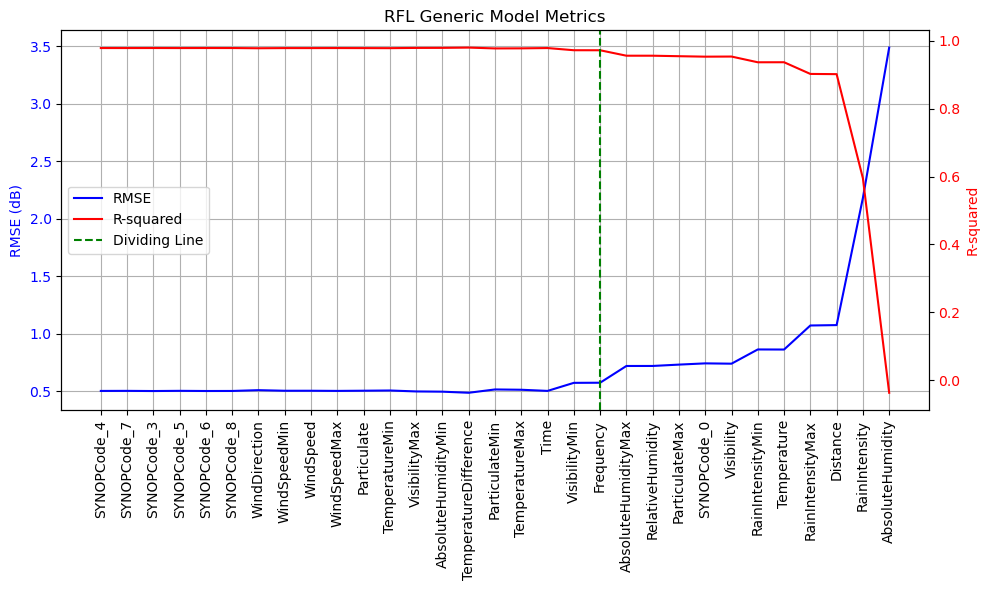

In [14]:
# Create a figure and set up figure size
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot RMSE
ax1.plot(removed_feature_names, cumulative_rmse, color='blue', label='RMSE')
ax1.set_ylabel('RMSE (dB)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Rotate the x-labels 90 degrees
ax1.tick_params(axis='x', labelrotation = 90)

# Plot R-squared
ax2 = ax1.twinx()
ax2.plot(removed_feature_names, cumulative_r2, color='red', label='R-squared')
ax2.set_ylabel('R-squared', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a dividing line to indicate the turning point
dividing_line_idx = removed_feature_names.index('Frequency')
ax2.axvline(x=dividing_line_idx, color='green', linestyle='--', label='Dividing Line')

# Add legends
line1, label1 = ax1.get_legend_handles_labels()
line2, label2 = ax2.get_legend_handles_labels()
ax1.legend(line1+line2, label1+label2, loc='center left')

# Add a title
plt.title('RFL Generic Model Metrics')
plt.tight_layout()

plt.show()

### Train model with only important features (on the right of dividing line)

In [15]:
# Define RFL generic model important features - based on the plot above
rfl_generic_important_features = ['Frequency', 'AbsoluteHumidityMax', 'RelativeHumidity', 'ParticulateMax',
                                'SYNOPCode_0', 'Visibility', 'RainIntensityMin', 'Temperature',
                                'RainIntensityMax', 'Distance', 'RainIntensity', 'AbsoluteHumidity']

# Create a Random Forest Regressor with OOB enabled (n_jobs = -1 means using all CPUs)
rf_generic = RandomForestRegressor(oob_score=True, n_jobs = -1, random_state=42)

# Fit the model with training data (only important features)
rf_generic.fit(X_train[rfl_generic_important_features], y_train)

# Create a dictionary that showing different weather match different SYNOP code
synop_codes = {
    'clear': 0,
    'dust storm': 3,
    'fog': 4,
    'drizzle': 5,
    'rain': 6,
    'snow': 7,
    'showers': 8
}

# Create a dictionary to store the results
rf_generic_performance_result = {}

# Loop through each SYNOP code and evaluate model performance for each specific weather condition
for condition, synop_value in synop_codes.items():
    # Construct the column name
    synop_column = f'SYNOPCode_{synop_value}'
    
    # Check if the SYNOP column exists in the test set
    if synop_column not in X_test.columns:
        print(f"No test data available for {condition.capitalize()} (column '{synop_column}' not found)")
        continue

    # Select the test set with the given SYNOP code
    synop_tag = X_test[synop_column] == 1
    X_test_synop = X_test[synop_tag]  # Select all rows for the specifc weather with "True"

    # Use only the important features for prediction
    X_test_synop_important = X_test_synop[rfl_generic_important_features]
    y_test_synop = y_test[synop_tag]

    # Check if there are any rows for this SYNOP code
    if len(X_test_synop_important) == 0:
        print(f"No test data available for {condition.capitalize()}")
        continue

    # Do predictions on the selected test set
    y_pred_synop = rf_generic.predict(X_test_synop_important)

    # Calculate R-squared and RMSE
    rmse = np.sqrt(mean_squared_error(y_test_synop, y_pred_synop))
    r2 = r2_score(y_test_synop, y_pred_synop)
    
    # Store the results
    rf_generic_performance_result[condition] = {
        'RMSE': rmse,
        'R-squared': r2    
    }

# Display the results
print(f"RFL Generic Random Forest Model")
print("\n")

for condition, metrics in rf_generic_performance_result.items():
    print(f"Performance for {condition.capitalize()} Weather:")
    print(f"  RMSE: {metrics['RMSE']:.4f}")
    print(f"  R-squared: {metrics['R-squared']:.4f}")
    print("\n")

RFL Generic Random Forest Model


Performance for Clear Weather:
  RMSE: 0.4050
  R-squared: 0.9747


Performance for Dust storm Weather:
  RMSE: 0.3888
  R-squared: 0.9846


Performance for Fog Weather:
  RMSE: 0.3364
  R-squared: 0.9596


Performance for Drizzle Weather:
  RMSE: 0.4831
  R-squared: 0.9715


Performance for Rain Weather:
  RMSE: 0.8290
  R-squared: 0.9573


Performance for Snow Weather:
  RMSE: 0.5585
  R-squared: 0.8989


Performance for Showers Weather:
  RMSE: 0.9429
  R-squared: 0.9034




# Free Space Optical (FSO)

In [16]:
data_fso = data.drop(columns=['RFL_Att'])

data_fso.head()

,FSO_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,RainIntensity,...,TemperatureMax,TemperatureMin,Time,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin
0,7.913289,17.595709,17.615907,17.340148,2115.338398,83500000000,0.0,0.0,0.0,0.0,...,26.603030,24.680849,9,65884.51846,72336.362233,65617.543754,88.755450,3.057066,6.863808,3.007939
1,7.451176,17.549693,17.572415,17.299439,2113.999257,73500000000,0.0,0.0,0.0,0.0,...,26.377164,24.313108,9,64963.41092,68753.386153,60379.327485,99.790057,2.727910,6.468903,2.537393
2,7.072747,17.290230,17.644014,16.037894,2118.689047,83500000000,0.0,0.0,0.0,0.0,...,27.670822,23.150277,10,54794.28107,54821.773817,50850.155963,65.730085,1.674810,2.826916,1.640809
3,6.949288,16.820880,17.066776,15.895622,2114.632339,73500000000,0.0,0.0,0.0,0.0,...,26.522100,23.174815,10,50205.64159,52519.927530,45374.510898,88.127497,0.962068,2.780643,0.886951
4,7.361052,16.813820,17.953974,15.227225,2116.786055,83500000000,0.0,0.0,0.0,0.0,...,26.305736,24.864100,10,59038.32599,64418.329138,54461.246506,84.167414,1.881007,4.476298,1.874052


## Split Data

In [17]:
# Split FSO dataset into Target variable (y) is 'FSO_Att' and features (X) are the remaining columns
X = data_fso.drop(columns=['FSO_Att'])
y = data_fso['FSO_Att']

# Split the data into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Check the shapes of each datasets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((68534, 25), (22845, 25), (68534,), (22845,))

## FSO Specific Random Forest
The training data is split into 7 small data sets for 7 different weather conditions

In [18]:
# Create a dictionary that showing different weather match different SYNOP code
synop_codes = {
    'clear': 0,
    'dust storm': 3,
    'fog': 4,
    'drizzle': 5,
    'rain': 6,
    'snow': 7,
    'showers': 8
}

# Initialize variables store the results
# models = {}
train_subsets = {}

# Split training data into 7 subsets based on SYNOPCode
for condition, synop_value in synop_codes.items():
    # Select the training set for the specific SYNOP code
    synop_tag = X_train['SYNOPCode'] == synop_value
    X_train_subset = X_train[synop_tag]
    y_train_subset = y_train[synop_tag]

    # Store the training subset
    if len(X_train_subset) > 0:
        train_subsets[condition] = (X_train_subset, y_train_subset)
    else:
        print(f"No training data available for {condition.capitalize()}")

### Feature Selection based on Out-of-bag (OOB)

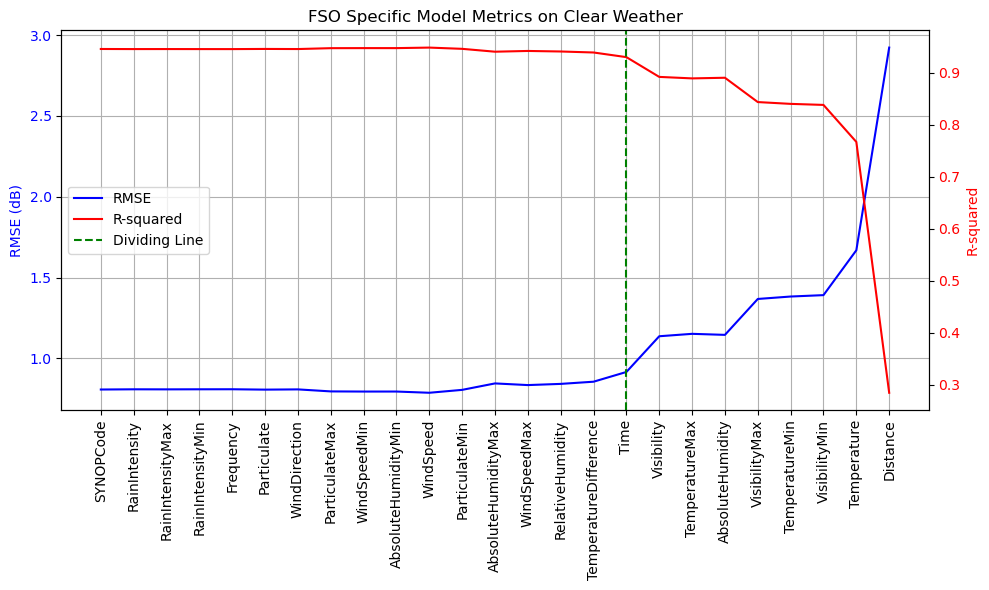

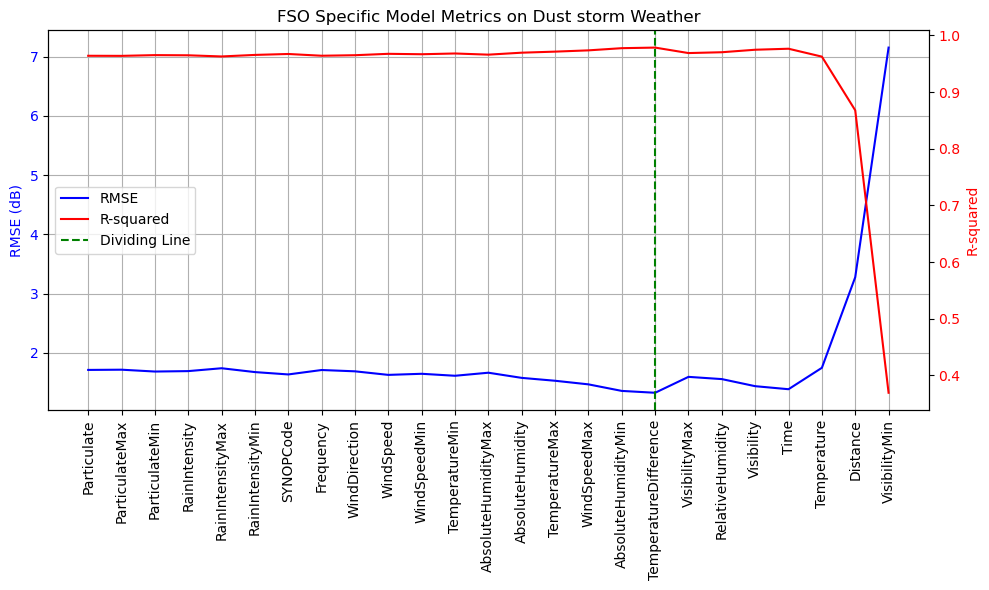

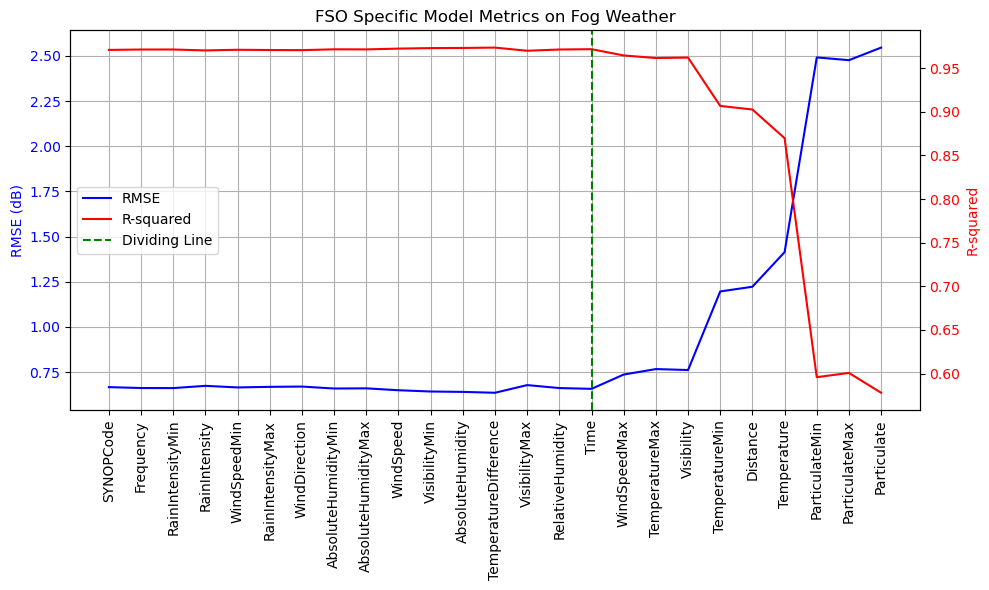

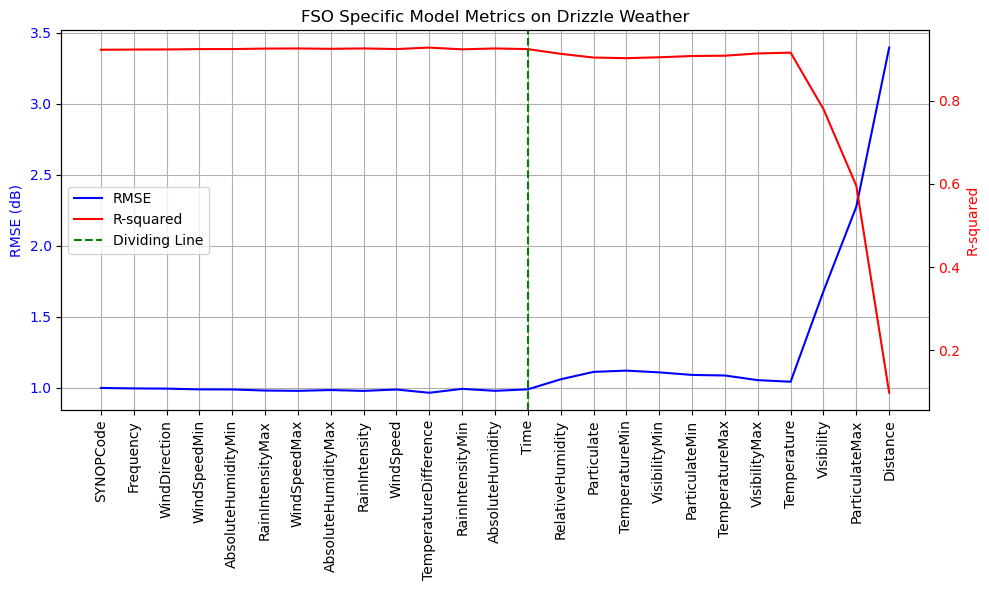

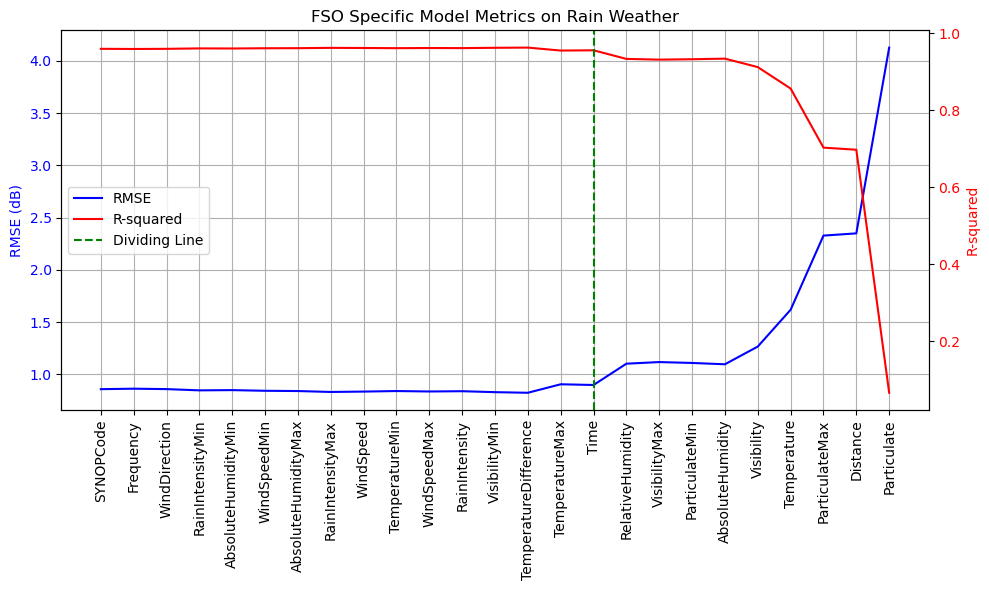

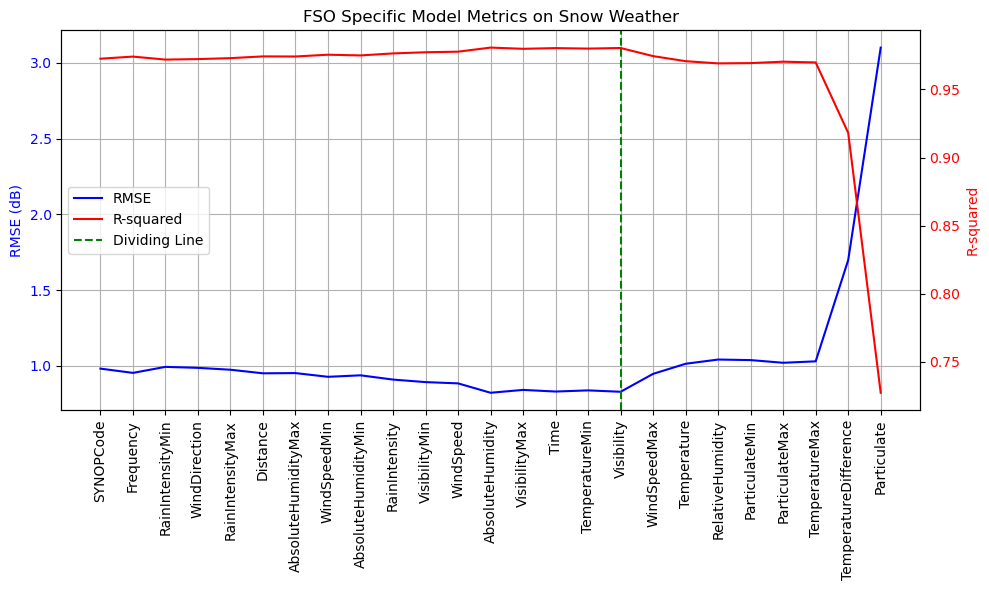

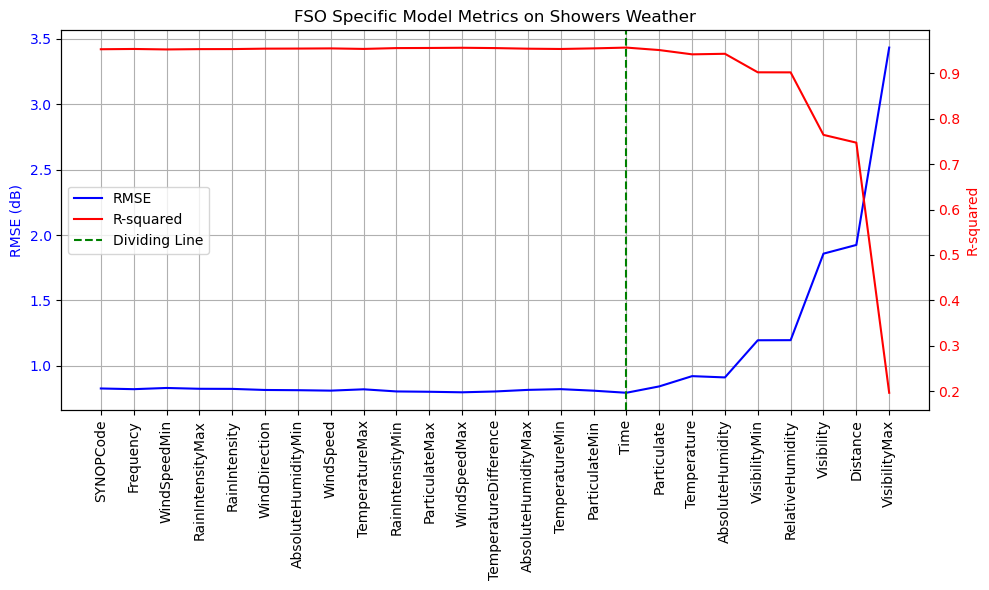

In [19]:
# Train a Random Forest model for each subset
for condition, (X_train_subset, y_train_subset) in train_subsets.items():
    # Create a Random Forest Regressor with OOB enabled
    model = RandomForestRegressor(oob_score=True, n_jobs=-1, random_state=42)
    
    # Fit the model with the initial set of training data
    model.fit(X_train_subset, y_train_subset)

    # Initialize variables to store the results
    cumulative_rmse = []
    cumulative_r2 = []
    cumulative_results = []
    removed_feature_names = []

    # Start with all features initially selected
    selected_features = X_train_subset.columns.tolist()
    
    # Select the testing set for the specific SYNOP code
    synop_tag = X_test['SYNOPCode'] == synop_codes[condition]
    X_test_subset = X_test[synop_tag]
    y_test_subset = y_test[synop_tag]
    
    # Iteratively remove features until none are left
    while len(selected_features) > 0:
        # Train the model with the current selected features
        model.fit(X_train_subset[selected_features], y_train_subset)

        # Do predictions on training & testing data
        y_train_subset_pred = model.predict(X_train_subset[selected_features])
        y_test_subset_pred = model.predict(X_test_subset[selected_features])

        # Calculate RMSE & R-squared values
        train_rmse = np.sqrt(mean_squared_error(y_train_subset, y_train_subset_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test_subset, y_test_subset_pred))
        train_r2 = r2_score(y_train_subset, y_train_subset_pred)
        test_r2 = r2_score(y_test_subset, y_test_subset_pred)

        # Store the RMSE, R-squared values for visualization later
        cumulative_rmse.append(test_rmse)
        cumulative_r2.append(test_r2)
        cumulative_results.append((train_rmse, test_rmse, train_r2, test_r2))
        
        # Get the current feature importances
        feature_importances = model.feature_importances_

        # Find the least important feature based on the current model
        least_important_feature_index = feature_importances.argmin()
        least_important_feature_name = selected_features[least_important_feature_index]

        # Track the removed feature
        removed_feature_names.append(least_important_feature_name)

        # Remove the least important feature from the list of selected features
        selected_features.remove(least_important_feature_name)
    
    # Record the turnning point
    if condition == 'clear':
        dividing_line_idx = removed_feature_names.index('Time')
        
    elif condition == 'dust storm':
        dividing_line_idx = removed_feature_names.index('TemperatureDifference')
        
    elif condition == 'fog':
        dividing_line_idx = removed_feature_names.index('Time')
    
    elif condition == 'drizzle':
        dividing_line_idx = removed_feature_names.index('Time')
    
    elif condition == 'rain':
        dividing_line_idx = removed_feature_names.index('Time')
        
    elif condition == 'snow':
        dividing_line_idx = removed_feature_names.index('Visibility')
        
    elif condition == 'showers':
        dividing_line_idx = removed_feature_names.index('Time')
    
    # Plotting the results for the condition
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot RMSE on the primary y-axis
    ax1.plot(removed_feature_names, cumulative_rmse, color='blue', label='RMSE')
    ax1.set_ylabel('RMSE (dB)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.grid(True)

    # Rotate the x-axis labels for better readability
    ax1.tick_params(axis='x', labelrotation=90)

    # Plot R-squared on the secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(removed_feature_names, cumulative_r2, color='red', label='R-squared')
    ax2.set_ylabel('R-squared', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Add a dividing line to indicate the turning point
    ax2.axvline(x=dividing_line_idx, color='green', linestyle='--', label='Dividing Line')

    
    # Add legends
    line1, label1 = ax1.get_legend_handles_labels()
    line2, label2 = ax2.get_legend_handles_labels()
    ax1.legend(line1 + line2, label1 + label2, loc='center left')

    # Add a title
    plt.title(f'FSO Specific Model Metrics on {condition.capitalize()} Weather')
    plt.tight_layout()

    # Show the plot
    plt.show()

### Train models with only important variables (on the right of dividing line) for each weather condition

In [20]:
# Create a dictionary record only important features
important_features_dict = {
    'clear': ['Time', 'Visibility', 'TemperatureMax', 'AbsoluteHumidity', 'VisibilityMax',
              'TemperatureMin', 'VisibilityMin', 'Temperature', 'Distance'],
    
    'dust storm': ['TemperatureDifference', 'VisibilityMax', 'RelativeHumidity', 'Visibility', 'Time', 'Temperature', 'Distance',
                   'VisibilityMin'],
    
    'fog': ['Time', 'WindSpeedMax', 'TemperatureMax', 'Visibility', 'TemperatureMin', 'Distance',
            'Temperature', 'ParticulateMin', 'ParticulateMax', 'Particulate'],
    
    'drizzle': ['Time', 'RelativeHumidity', 'Particulate', 'TemperatureMin', 'VisibilityMin', 'ParticulateMin', 'TemperatureMax',
                 'VisibilityMax', 'Temperature', 'Visibility', 'ParticulateMax', 'Distance'],
    
    'rain': ['Time', 'RelativeHumidity', 'VisibilityMax', 'ParticulateMin', 'AbsoluteHumidity', 'Visibility', 'Temperature', 
             'ParticulateMax', 'Distance', 'Particulate'],
    
    'snow': ['Visibility', 'WindSpeedMax', 'Temperature', 'RelativeHumidity', 'ParticulateMin', 'ParticulateMax', 'TemperatureMax',
             'TemperatureDifference', 'Particulate'],
    
    'showers': ['Time', 'Particulate', 'Temperature', 'AbsoluteHumidity', 'VisibilityMin',
                'RelativeHumidity', 'Visibility', 'Distance', 'VisibilityMax']
}

In [21]:
# Create a dictionary to store the results
fso_specific_performance_result = {}

# Train the models using only the important features for each condition
for condition, (X_train_subset, y_train_subset) in train_subsets.items():
    # Get the important features for the current condition
    condition_important_features = important_features_dict[condition]

    # Select only the important features for this condition
    X_train_subset_important = X_train_subset[condition_important_features]

    # Train a Random Forest model using only the important features with OOB enabled (n_jobs = -1 means using all CPUs)
    fso_specific = RandomForestRegressor(oob_score=True, n_jobs = -1, random_state=42)
    
    # Fit the model with training data with only important features
    fso_specific.fit(X_train_subset_important, y_train_subset)

    # Select the test set with the given SYNOP code
    synop_tag = X_test['SYNOPCode'] == synop_codes[condition]
    X_test_subset = X_test[synop_tag]
    y_test_subset = y_test[synop_tag]

    # Select only the important features from the test set for this condition
    X_test_subset_important = X_test_subset[condition_important_features]

    # Check if there's any data to evaluate
    if len(X_test_subset_important) > 0:
        # Do predictions for the specific test subset
        y_pred_subset = fso_specific.predict(X_test_subset_important)

        # Calculate R-squared and RMSE 
        r2_subset = r2_score(y_test_subset, y_pred_subset)
        rmse_subset = np.sqrt(mean_squared_error(y_test_subset, y_pred_subset))

        # Store the results
        fso_specific_performance_result[condition] = {
            'RMSE': rmse_subset,
            'R-squared': r2_subset     
        }
    else:
        print(f"No test data available for {condition}")
        
# Display the results
print(f"FSO Specific Random Forest Model")
print("\n")

for condition, metrics in fso_specific_performance_result.items():
    print(f"Performance for {condition.capitalize()} Weather:")
    print(f"  RMSE (Condition Only): {metrics['RMSE']:.4f}")
    print(f"  R-squared (Condition Only): {metrics['R-squared']:.4f}")
    print("\n")

FSO Specific Random Forest Model


Performance for Clear Weather:
  RMSE (Condition Only): 0.9144
  R-squared (Condition Only): 0.9300


Performance for Dust storm Weather:
  RMSE (Condition Only): 1.3290
  R-squared (Condition Only): 0.9782


Performance for Fog Weather:
  RMSE (Condition Only): 0.6514
  R-squared (Condition Only): 0.9724


Performance for Drizzle Weather:
  RMSE (Condition Only): 0.9931
  R-squared (Condition Only): 0.9228


Performance for Rain Weather:
  RMSE (Condition Only): 0.8983
  R-squared (Condition Only): 0.9558


Performance for Snow Weather:
  RMSE (Condition Only): 0.8307
  R-squared (Condition Only): 0.9804


Performance for Showers Weather:
  RMSE (Condition Only): 0.7994
  R-squared (Condition Only): 0.9564




## FSO Generic Random Forest
All the training data is used to build a random forest by treating the SYNOP code as a categorical variable. 

In [22]:
# Perform one-hot encoding for 'SYNOPCode' column
data_fso_encoded = pd.get_dummies(data_fso, columns=['SYNOPCode'], prefix='SYNOPCode', dtype=float)

# data_fso_encoded.describe()
# data_fso_encoded.head()

In [23]:
# Split FSO dataset into Target variable (y) is 'FSO_Att' and features (X) are the remaining columns
X = data_fso_encoded.drop(columns=['FSO_Att'])
y = data_fso_encoded['FSO_Att']

# Split the data into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Check the shapes of each datasets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((68534, 31), (22845, 31), (68534,), (22845,))

### Feature Selection based on Out-of-bag (OOB)

In [24]:
# Create a Random Forest Regressor with OOB enabled (n_jobs = -1 means using all CPUs)
model = RandomForestRegressor(oob_score=True, n_jobs = -1, random_state=42)

# Fit the model with the training data
model.fit(X_train, y_train)

# Initialize variables store the results
cumulative_rmse = []
cumulative_r2 = []
cumulative_results = []
removed_feature_names = []

# Initialize selecting all features at start
selected_features = X_train.columns.tolist()
# selected_features

while len(selected_features) > 0:
    # Train the model with the current set of selected features
    model.fit(X_train[selected_features], y_train)
    
    # Do prediction on training & testing data
    y_train_pred = model.predict(X_train[selected_features])
    y_test_pred = model.predict(X_test[selected_features])
    
    # Calculate RMSE & R-squared
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Store the RMSE and R-squared
    cumulative_rmse.append(test_rmse)
    cumulative_r2.append(test_r2)
    cumulative_results.append((train_rmse, test_rmse, train_r2, test_r2))
    
    # Get the feature importances from the model
    feature_importances = model.feature_importances_
    
    # Find the least important feature index and name
    least_important_feature_index = feature_importances.argmin()
    least_important_feature_name = selected_features[least_important_feature_index]
    
    # Track the removed feature name
    removed_feature_names.append(least_important_feature_name)

    # Remove the least important feature from the list of selected features
    selected_features.remove(least_important_feature_name)

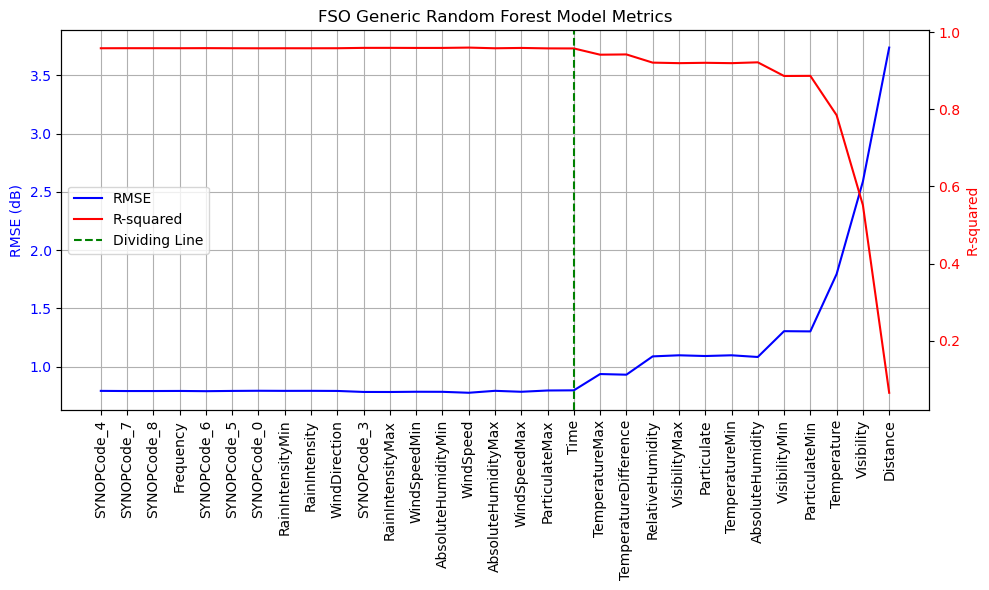

In [25]:
# Create a figure and set up figure size
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot RMSE
ax1.plot(removed_feature_names, cumulative_rmse, color='blue', label='RMSE')
ax1.set_ylabel('RMSE (dB)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Rotate the x-labels 90 degrees
ax1.tick_params(axis='x', labelrotation = 90)

# Plot R-squared
ax2 = ax1.twinx()
ax2.plot(removed_feature_names, cumulative_r2, color='red', label='R-squared')
ax2.set_ylabel('R-squared', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a dividing line to indicate the turning point
dividing_line_idx = removed_feature_names.index('Time')
ax2.axvline(x=dividing_line_idx, color='green', linestyle='--', label='Dividing Line')

# Add legends
line1, label1 = ax1.get_legend_handles_labels()
line2, label2 = ax2.get_legend_handles_labels()
ax1.legend(line1+line2, label1+label2, loc='center left')

# Add a title
plt.title('FSO Generic Random Forest Model Metrics')
plt.tight_layout()

plt.show()

### Train model with important features (on the right of dividing line)

In [26]:
# Define FSO generic model important features - based on the plot above
fso_generic_important_features = ['TemperatureDifference', 'Time', 'TemperatureMax', 'RelativeHumidity',
                                  'VisibilityMax', 'Particulate', 'TemperatureMin', 'AbsoluteHumidity',
                                  'VisibilityMin', 'ParticulateMin', 'Temperature', 'Visibility',
                                  'Distance']

# Create a Random Forest Regressor with OOB enabled (n_jobs = -1 means using all CPUs)
fso_generic = RandomForestRegressor(oob_score=True, n_jobs = -1, random_state=42)

# Fit the model with training data with only important features
fso_generic.fit(X_train[fso_generic_important_features], y_train)

# Create a dictionary that showing different weather match different SYNOP code
synop_codes = {
    'clear': 0,
    'dust storm': 3,
    'fog': 4,
    'drizzle': 5,
    'rain': 6,
    'snow': 7,
    'showers': 8
}

# Create a dictionary to store the results
fso_generic_performance_result = {}

# Loop through each SYNOP code and evaluate model performance for each specific weather condition
for condition, synop_value in synop_codes.items():
    # Construct the column name
    synop_column = f'SYNOPCode_{synop_value}'
    
    # Check if the SYNOP column exists in the test set
    if synop_column not in X_test.columns:
        print(f"No test data available for {condition.capitalize()} (column '{synop_column}' not found)")
        continue

    # Select the test set with the given SYNOP code
    synop_tag = X_test[synop_column] == 1
    X_test_synop = X_test[synop_tag]  # Select all rows for the specifc weather with "True"

    # Use only the important features for prediction
    X_test_synop_important = X_test_synop[fso_generic_important_features]
    y_test_synop = y_test[synop_tag]

    # Check if there are any rows for this SYNOP code
    if len(X_test_synop_important) == 0:
        print(f"No test data available for {condition.capitalize()}")
        continue

    # Do predictions on the selected test set
    y_pred_synop = fso_generic.predict(X_test_synop_important)

    # Calculate performance metrics
    rmse = np.sqrt(mean_squared_error(y_test_synop, y_pred_synop))
    r2 = r2_score(y_test_synop, y_pred_synop)
    
    # Store the results
    fso_generic_performance_result[condition] = {
        'RMSE': rmse,
        'R-squared': r2    
    }

# Display the results
print(f"FSO Generic Random Forest Model")
print("\n")

for condition, metrics in fso_generic_performance_result.items():
    print(f"Performance for {condition.capitalize()} Weather:")
    print(f"  RMSE: {metrics['RMSE']:.4f}")
    print(f"  R-squared: {metrics['R-squared']:.4f}")
    print("\n")

FSO Generic Random Forest Model


Performance for Clear Weather:
  RMSE: 0.7983
  R-squared: 0.9467


Performance for Dust storm Weather:
  RMSE: 1.2512
  R-squared: 0.9807


Performance for Fog Weather:
  RMSE: 0.8514
  R-squared: 0.9528


Performance for Drizzle Weather:
  RMSE: 0.7377
  R-squared: 0.9574


Performance for Rain Weather:
  RMSE: 0.7961
  R-squared: 0.9653


Performance for Snow Weather:
  RMSE: 1.2060
  R-squared: 0.9587


Performance for Showers Weather:
  RMSE: 0.7329
  R-squared: 0.9634




# Model Comparison (Specific VS Generic)

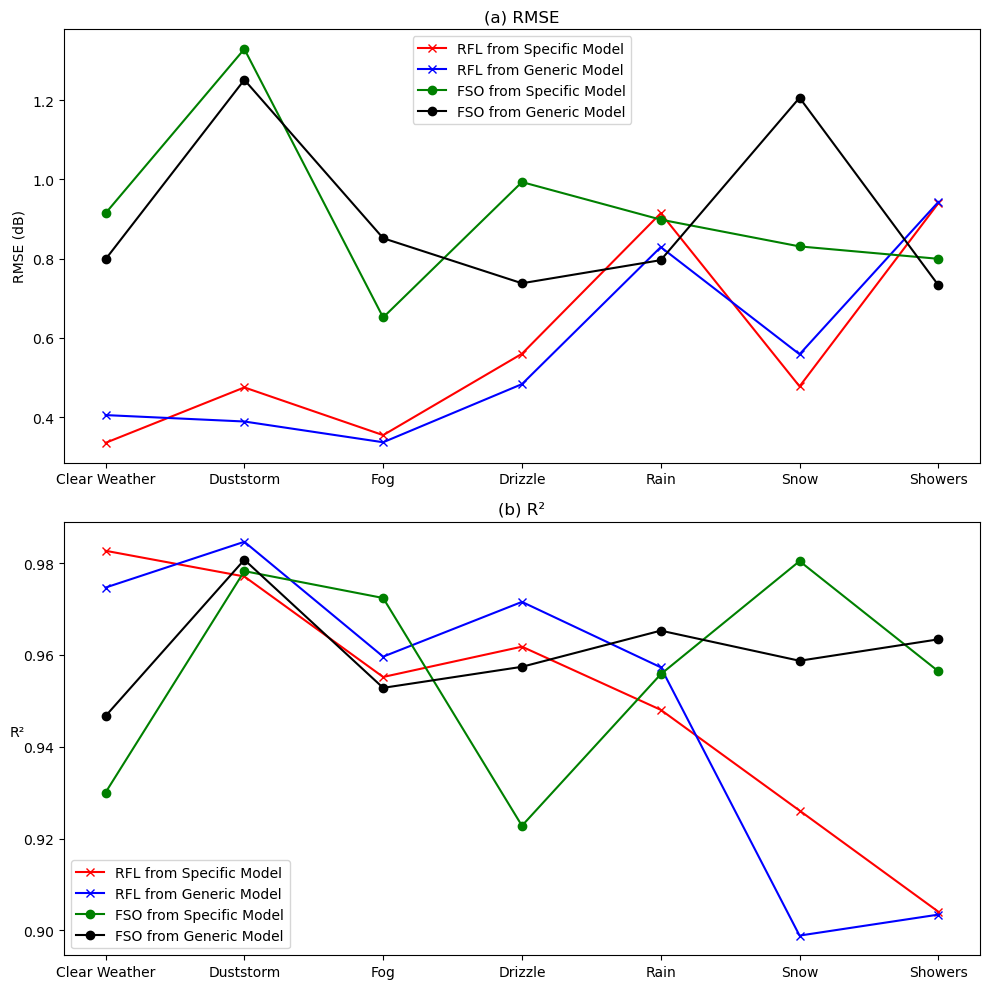

In [27]:
# define weather conditions list
weather_conditions = ['Clear Weather', 'Duststorm', 'Fog', 'Drizzle', 'Rain', 'Snow', 'Showers']

# define variable lists
rf_specific_rmse = []
rf_generic_rmse = []
fso_specific_rmse = []
fso_generic_rmse = []

rf_specific_r2 = []
rf_generic_r2 = []
fso_specific_r2 = []
fso_generic_r2 = []

# Extract RMSE & R-square
for condition in rf_specific_performance_result:
    rmse = rf_specific_performance_result[condition]['RMSE']
    r2 = rf_specific_performance_result[condition]['R-squared']

    rf_specific_rmse.append(rmse)
    rf_specific_r2.append(r2)
    
for condition in rf_generic_performance_result:
    rmse = rf_generic_performance_result[condition]['RMSE']
    r2 = rf_generic_performance_result[condition]['R-squared']

    rf_generic_rmse.append(rmse)
    rf_generic_r2.append(r2)
    
for condition in fso_specific_performance_result:
    rmse = fso_specific_performance_result[condition]['RMSE']
    r2 = fso_specific_performance_result[condition]['R-squared']

    fso_specific_rmse.append(rmse)
    fso_specific_r2.append(r2)

for condition in fso_generic_performance_result:
    rmse = fso_generic_performance_result[condition]['RMSE']
    r2 = fso_generic_performance_result[condition]['R-squared']

    fso_generic_rmse.append(rmse)
    fso_generic_r2.append(r2)

# Create a figure and set up figure size
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plot RMSE 
ax1.plot(weather_conditions, rf_specific_rmse, 'r-x', label='RFL from Specific Model')
ax1.plot(weather_conditions, rf_generic_rmse, 'b-x', label='RFL from Generic Model')
ax1.plot(weather_conditions, fso_specific_rmse, 'g-o', label='FSO from Specific Model')
ax1.plot(weather_conditions, fso_generic_rmse, 'k-o', label='FSO from Generic Model')

ax1.set_ylabel('RMSE (dB)')
ax1.set_title('(a) RMSE')
ax1.legend()

# Plot R-square 
ax2.plot(weather_conditions, rf_specific_r2, 'r-x', label='RFL from Specific Model')
ax2.plot(weather_conditions, rf_generic_r2, 'b-x', label='RFL from Generic Model')
ax2.plot(weather_conditions, fso_specific_r2, 'g-o', label='FSO from Specific Model')
ax2.plot(weather_conditions, fso_generic_r2, 'k-o', label='FSO from Generic Model')

ax2.set_ylabel('R²', rotation=0)
ax2.set_title('(b) R²')
ax2.legend()

# Adjust the layout
plt.tight_layout()
plt.show()

In [28]:
# Define variable lists to store result
rf_difference_rmse = []
rf_difference_r2 = []
rf_difference_rmse_percentage = []
rf_difference_r2_percentage = []

fso_difference_rmse = []
fso_difference_r2 = []
fso_difference_rmse_percentage = []
fso_difference_r2_percentage = []

# Calculate difference and difference in percentage
for i in range(len(weather_conditions)):
    rf_diff_rmse = rf_specific_rmse[i] - rf_generic_rmse[i]
    rf_diff_rmse_percentage = rf_diff_rmse / rf_generic_rmse[i] * 100
    rf_difference_rmse.append(rf_diff_rmse)
    rf_difference_rmse_percentage.append(rf_diff_rmse_percentage)
    
    rf_diff_r2 = rf_specific_r2[i] - rf_generic_r2[i] 
    rf_diff_r2_percentage = rf_diff_r2 / rf_generic_r2[i] * 100
    rf_difference_r2.append(rf_diff_r2)
    rf_difference_r2_percentage.append(rf_diff_r2_percentage)
    
    fso_diff_rmse = fso_specific_rmse[i] - fso_generic_rmse[i]
    fso_diff_rmse_percentage = fso_diff_rmse / fso_generic_rmse[i] * 100
    fso_difference_rmse.append(fso_diff_rmse)
    fso_difference_rmse_percentage.append(fso_diff_rmse_percentage)
    
    fso_diff_r2 = fso_specific_r2[i] - fso_generic_r2[i]
    fso_diff_r2_percentage = fso_diff_r2 / fso_generic_r2[i] * 100
    fso_difference_r2.append(fso_diff_r2)
    fso_difference_r2_percentage.append(fso_diff_r2_percentage)
    

# Display result
for i in range(len(weather_conditions)):
    print(f"For {weather_conditions[i]}:")
    print(f"RF Att. RMSE(dB) {rf_difference_rmse[i]:.4f} ({rf_difference_rmse_percentage[i]:.4f}%)")
    print(f"RF Att. R² {rf_difference_r2[i]:.4f} ({rf_difference_r2_percentage[i]:.4f}%)")
    print(f"FSO Att. RMSE(dB) {fso_difference_rmse[i]:.4f} ({fso_difference_rmse_percentage[i]:.4f}%)")
    print(f"FSO Att. R² {fso_difference_r2[i]:.4f} ({fso_difference_r2_percentage[i]:.4f}%)")
    print("\n")

For Clear Weather:
RF Att. RMSE(dB) -0.0700 (-17.2968%)
RF Att. R² 0.0080 (0.8217%)
FSO Att. RMSE(dB) 0.1162 (14.5540%)
FSO Att. R² -0.0167 (-1.7589%)


For Duststorm:
RF Att. RMSE(dB) 0.0860 (22.1330%)
RF Att. R² -0.0076 (-0.7677%)
FSO Att. RMSE(dB) 0.0777 (6.2125%)
FSO Att. R² -0.0025 (-0.2520%)


For Fog:
RF Att. RMSE(dB) 0.0180 (5.3434%)
RF Att. R² -0.0044 (-0.4618%)
FSO Att. RMSE(dB) -0.2000 (-23.4930%)
FSO Att. R² 0.0196 (2.0535%)


For Drizzle:
RF Att. RMSE(dB) 0.0767 (15.8664%)
RF Att. R² -0.0097 (-1.0035%)
FSO Att. RMSE(dB) 0.2555 (34.6295%)
FSO Att. R² -0.0346 (-3.6153%)


For Rain:
RF Att. RMSE(dB) 0.0855 (10.3106%)
RF Att. R² -0.0093 (-0.9674%)
FSO Att. RMSE(dB) 0.1023 (12.8447%)
FSO Att. R² -0.0095 (-0.9835%)


For Snow:
RF Att. RMSE(dB) -0.0810 (-14.5101%)
RF Att. R² 0.0272 (3.0282%)
FSO Att. RMSE(dB) -0.3753 (-31.1169%)
FSO Att. R² 0.0217 (2.2630%)


For Showers:
RF Att. RMSE(dB) -0.0031 (-0.3266%)
RF Att. R² 0.0006 (0.0697%)
FSO Att. RMSE(dB) 0.0665 (9.0799%)
FSO Att. R

# Further Plan
- Improve models by exploring the correlation among the weather parameters.
- GridSearchCV tune the Random Forest Tree Structure to improve models.
- Choosing Neural Network to build models instead of Random Forest.
- Model comparison, further analysis.